<a href="https://colab.research.google.com/github/MarioCalvarro/practicasIA/blob/main/P2_clustering_enunciado_2324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: E__

__Nombres de los estudiantes: Mario Calvarro Marines & Beñat Perez de Arenaza Eizaguire__

In [1]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
df.describe().transpose()

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

En primer lugar, analizaremos una a una las variables numéricas:

####Habitaciones

In [4]:
df['total_rooms'].describe().transpose()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

<Axes: ylabel='Density'>

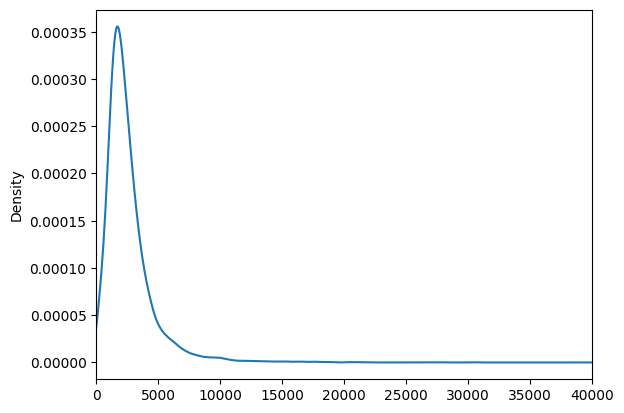

In [5]:
df["total_rooms"].plot(kind="density", xlim=[0, 40000])

En la gráfica podemos observar que la mayoría de distritos tienen entre 1 y 4000 habitaciones (lo que posiblemente sean comunidades de viviendas unifamiliares). Sin embargo, existe algún distrito (posiblemente en las grandes ciudades) con hasta 40000 habitaciones.

####Dormitorios

In [6]:
df['total_bedrooms'].describe().transpose()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

<Axes: ylabel='Density'>

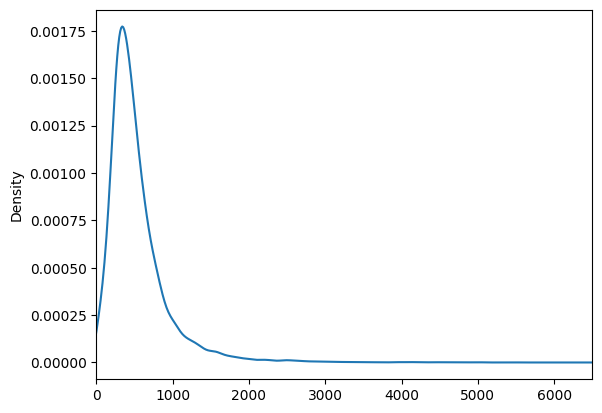

In [7]:
df["total_bedrooms"].plot(kind="density", xlim=[0, 6500])

Al ser el número de dormitorios una variable muy similar al número de habitaciones, tenemos que estas dos variables siguen una distribución muy similar (y una no aporta mucha información nueva con respecto a la otra).

####Población

In [8]:
df['population'].describe().transpose()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

<Axes: ylabel='Density'>

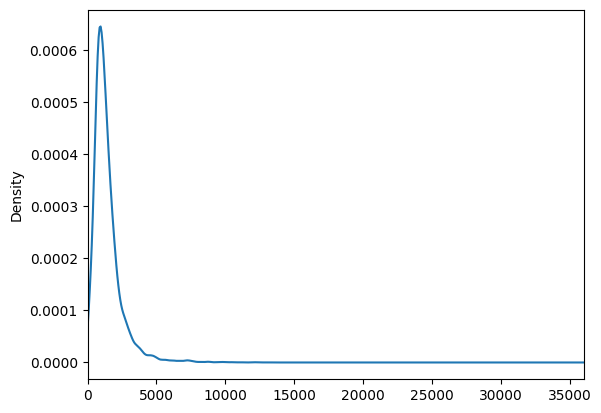

In [9]:
df["population"].plot(kind="density", xlim=[0, 36000])

De nuevo, esta variable nos aporta aproximadamente la misma información que las dos anteriores.

####Hogares

In [10]:
df['households'].describe().transpose()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64

<Axes: ylabel='Density'>

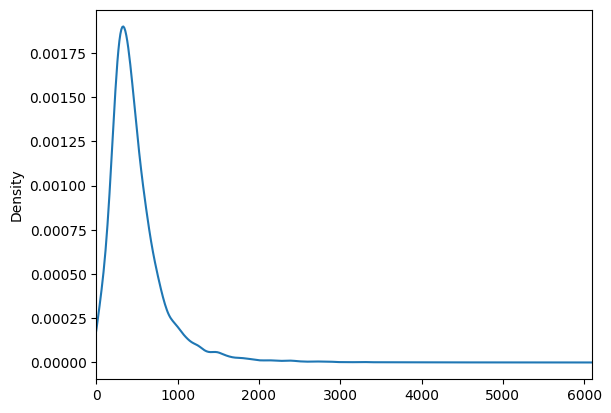

In [11]:
df["households"].plot(kind="density", xlim=[0, 6100])

Véase el anterior comentario.

####Ingresos

In [12]:
df['median_income'].describe().transpose()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

<Axes: ylabel='Density'>

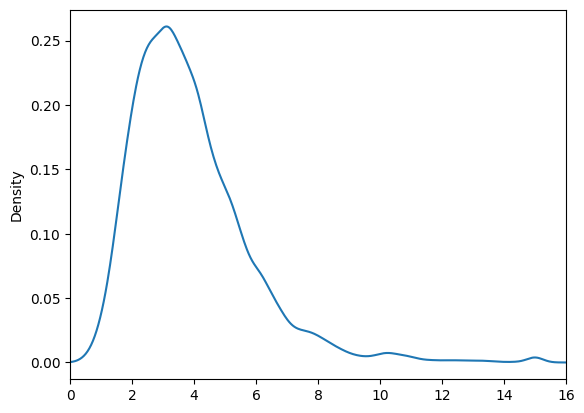

In [13]:
df["median_income"].plot(kind="density", xlim=[0, 16])

Esta gráfica nos indica el salario medio mensual de las distintas comunidades. Como se puede apreciar, en el estado de California se ofrecen (de manera más o menos general) salarios bastante competitivos (entre 2 y 6 mil dolares), aunque también existen algunas comunidades con salarios aún mayores (hasta 16mil dolares de media) y menores.

####Valor

In [14]:
df['median_house_value'].describe().transpose()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

<Axes: ylabel='Density'>

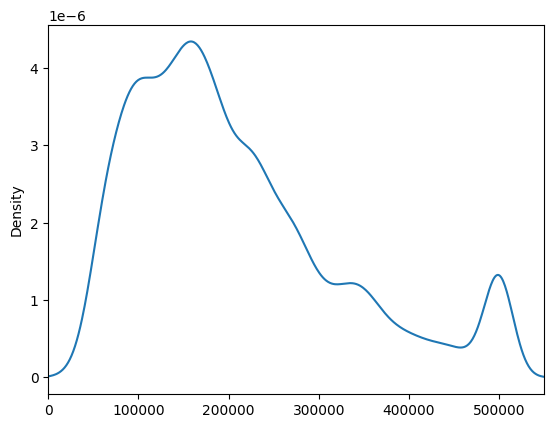

In [15]:
df["median_house_value"].plot(kind="density", xlim=[0, 550000])

En este caso podemos apreciar que los hogares en California tienen un alto valor ya que la mayoría se encuentran entre los 100mil y 400mil dólares. Sin embargo, es posible que en la recogida de datos se haya establecido un límite superior arbitrario en los 500mil dolares puesto que en este punto aparece una subida muy rápida en el número de comunidades en las que el valor medio es exactamente este número.

#### Antigüedad

In [16]:
df['housing_median_age'].describe().transpose()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

<Axes: ylabel='Density'>

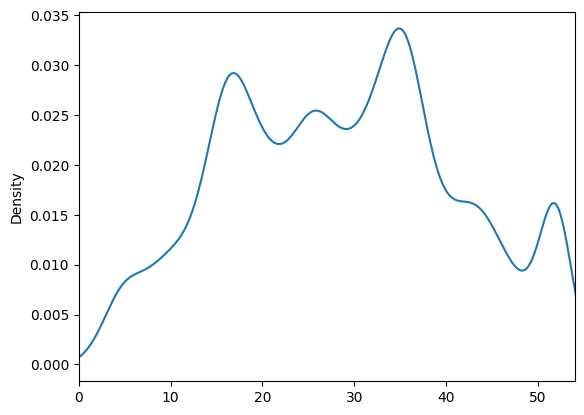

In [17]:
df["housing_median_age"].plot(kind="density", xlim=[0, 54])

Podemos apreciar que la mediana de antigüedad de los hogares en las distintas comunidades de California tiene una gran variabilidad siendo el rango más común entre los 15 y los 40 años, aunque también existe un elevado número de comunidades con hogares bastante viejos (50 años). Es posible que este salto también se deba a un error en la recogida de datos.

#### Relaciones
A continuación, mostraremos una imagen global de todos los pares de variables. De estos, analizaremos los más relevantes uno a uno.

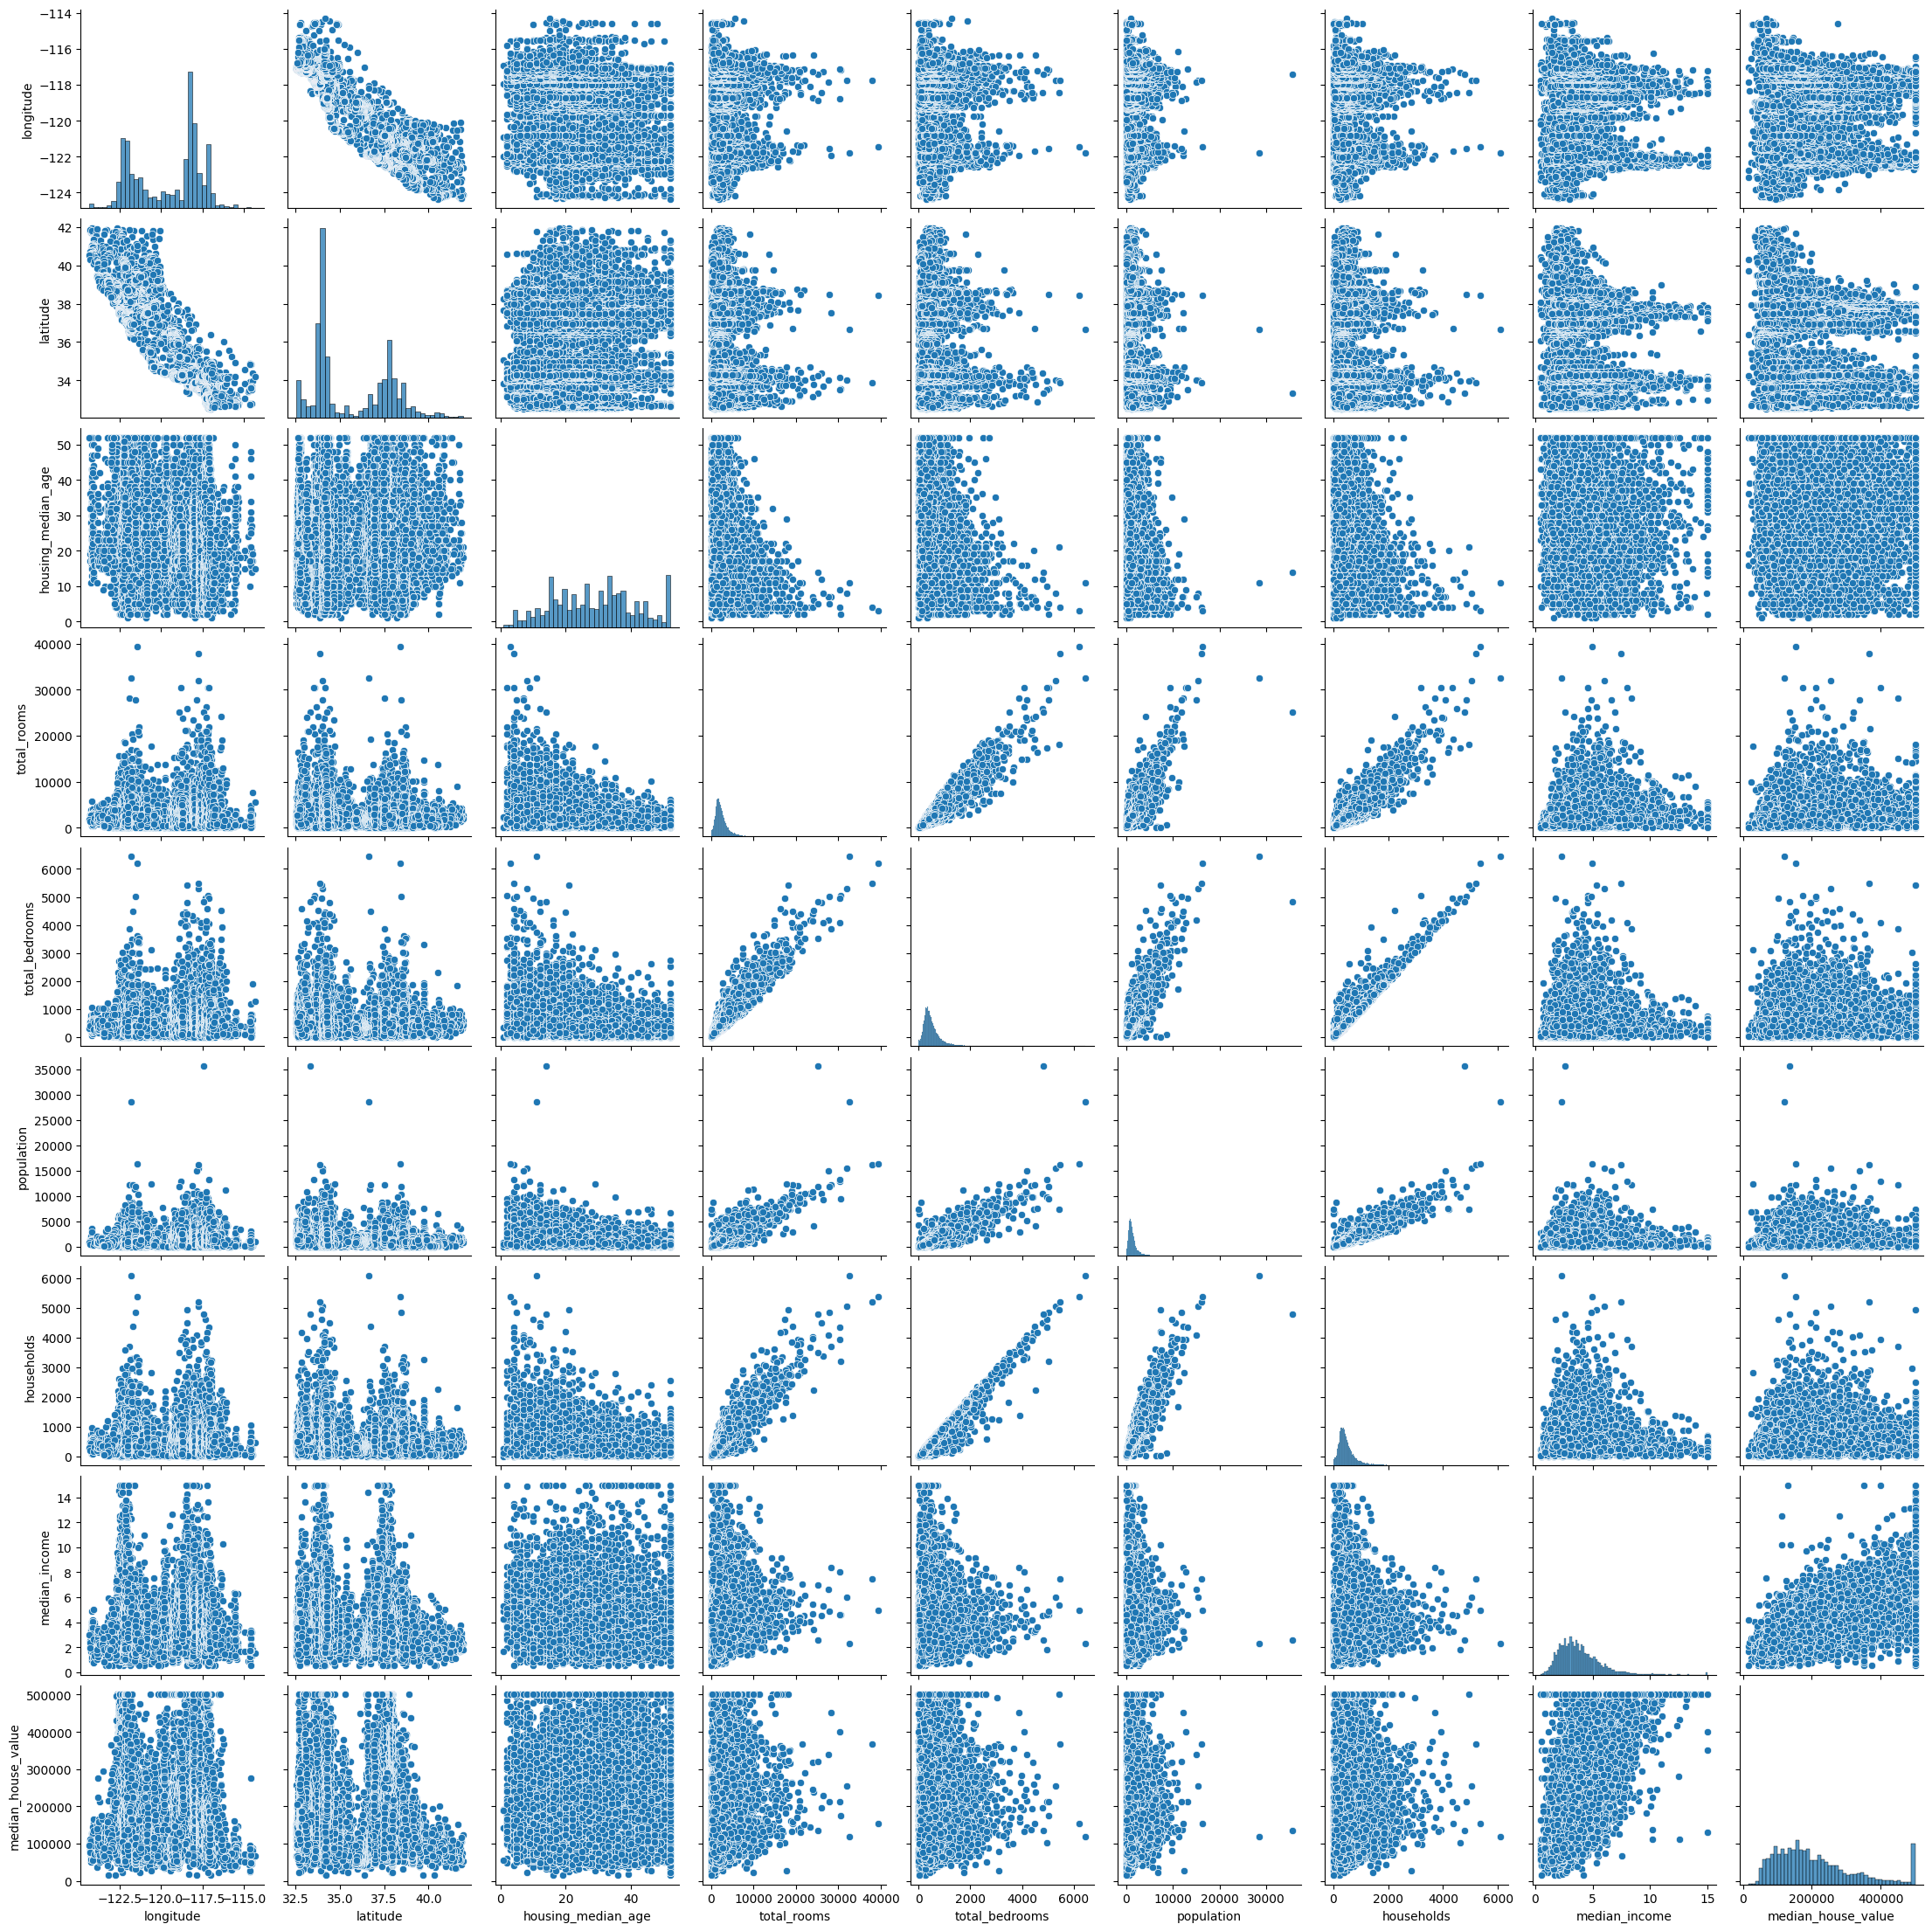

In [18]:
sns.pairplot(df)

Para comenzar, calculemos la matriz de correlación de las variables para decidir qué pares de variables serán intersantes de comparar; si dos variables tiene una correlación baja en valor absoluto, no tendrá mucho interés compararlos, ya que probablemente no podramos sacar nada en claro de ello. No obstante, si la correlación es alta, entonces la comparación podrá llevarnos a inferir ciertas conclusiones. En este caso, consideraremos por alta aquella correlación que sea superior a 0.65. Esto es, analizaremos el comportamiento de aquellas duplas de variable culla correlación en valor absoluto sea mayor que 0.65.

In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

#### Longitud/Latitud
Veamos donde se sitúan las distintas viviendas a través de la relación entre longitud y latitud.

<Axes: xlabel='longitude', ylabel='latitude'>

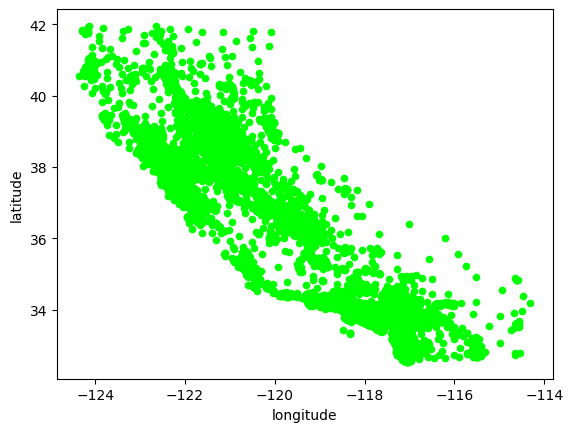

In [20]:
df.plot.scatter(x='longitude', y='latitude', c='lime')

Podemos apreciar el contorno del estado de California así como su geografía (donde hay desierto y montañas podemos encontrar menos hogares).

#### Población/Geografía


In [22]:
import plotly.express as px

# El gráfico muestra con un color más intenso los cuadrados (que son la suma de todos los puntos
# de datos contenidos en ellos) con un valor mayor
fig = px.density_heatmap(df, x='longitude', y='latitude', z='population',
                         color_continuous_scale='Brwnyl',
                         nbinsx=1000, nbinsy=500,)
fig.update_layout(title='Mapa de calor de California con \"population\" como densidad',
                  xaxis_title='Longitude',
                  yaxis_title='Latitude')

fig.show()

En el anterior gráfico podemos apreciar (con un mapa de calor) los lugares en los que se concentran los distritos con un número alto de número de habitantes. Claramente, estos se corresponden con las métropolis de California (zonas de San Franciso y Los Ángeles).

#### Antigüedad/Geografía

In [24]:
fig = px.scatter(df, x='longitude', y='latitude', color='housing_median_age',
                 color_continuous_scale='Brwnyl')

fig.update_layout(title='Mapa de California con los puntos indicando la antigüedad media de los hogares en los distintos distritos',
                  xaxis_title='Longitude',
                  yaxis_title='Latitude')

fig.show()

En la anterior gráfica podemos apreciar donde se está aumentanto la oferta de hogares en California al fijarnos en los lugares con comunidades con hogares relativamente modernos (inferior a 10 años). Por ejemplo, podemos destacar la zona el este de Los Ángeles con un número relativamente elevado de comunidades con hogares nuevos.

#### Habitaciones totales/Dormitorios totales

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

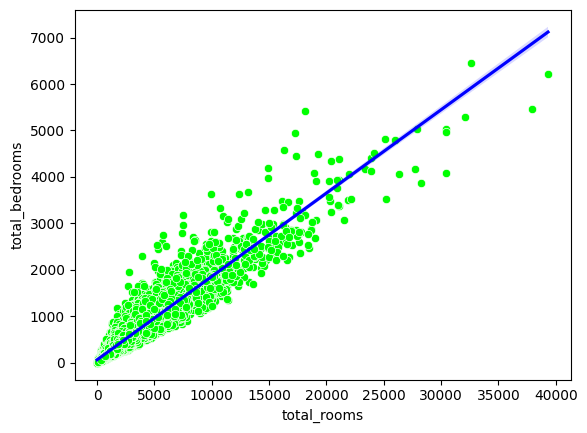

In [27]:
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms', color='lime')
sns.regplot(data=df, x='total_rooms', y='total_bedrooms', scatter=False, color='blue')

Como podemos apreciar la relación entre estas dos variables es lineal de forma que, como hemos indicado anteriormente, la información que nos aporta una es similar a la aportada por la otra. Esto se aplica a todas las variables que hemos dicho anteriormente (habitaciones totales, dormitorios totales, población y número de casas).

#### Ingresos  / Valor de la casa

<Axes: xlabel='median_income', ylabel='median_house_value'>

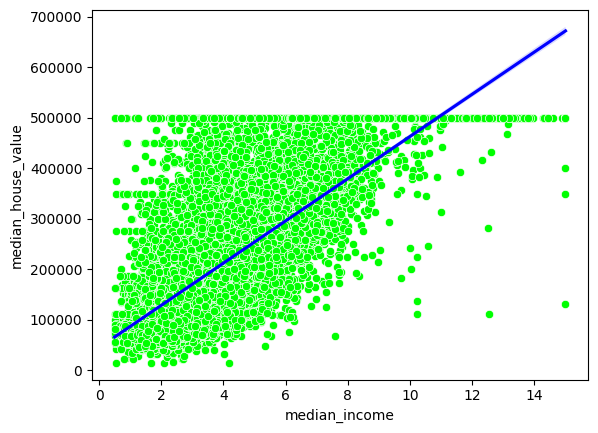

In [28]:
sns.scatterplot(data=df, x='median_income', y='median_house_value', c='lime')
sns.regplot(data=df, x='median_income', y='median_house_value', scatter=False, color='blue')

En esta nueva gráfica podemos observar que, por lo general, a mayor mediana de ingresos en una comunidad, mayor será la mediana del valor de los hogares. Sin embargo, como hemos dicho anteriormente, resulta bastante extraña la acumulación de puntos con un "median_house_value" de exactamente 500mil dólares, posiblemente debido a una recogida incorrecta de datos o un límite arbitrario impuesto por el creador del _dataset_.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [29]:
df['ocean_proximity'].describe().transpose()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

<Axes: >

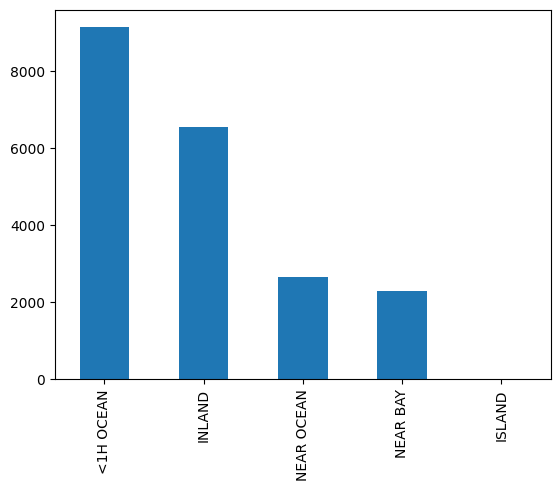

In [30]:
df["ocean_proximity"].value_counts().plot(kind='bar')

Podemos apreciar que la mayoría de hogares se encuentran cercanos al océano (<1H OCEAN, INLAND, NEAR_BAY), pero también existe un elevado número de comunidades en el interior del estado. Además, cabe destacar que existe un reducido, y posiblemente exclusivo, número de distritos en islas.

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

### 3.1) Subconjunto de variables
Como hemos venido adelantando, en el _dataset_ nos encontramos con múltiples variables que, de una forma u otra, nos aportan la misma información. Por esta razón, consideramos que lo mejor que podemos hacer es tomar una de estas variables como representante e ignorar el resto. Las variables que aportan la misma información son total_rooms, *total_bedrooms*, *population* y *households*. Como representante tomaremos *population*.
Por otro lado, la variable categórica que representa la distancia al mar ya es tenida en cuenta cuando vemos la longitud y la latitud del conjunto. Por ello, también la eliminaremos.

In [31]:
df2 = df.drop(columns=["total_rooms", "total_bedrooms", "households", "ocean_proximity"])

In [32]:
df2

longitude  latitude  housing_median_age  population  median_income  \
0        -122.23     37.88                41.0       322.0         8.3252   
1        -122.22     37.86                21.0      2401.0         8.3014   
2        -122.24     37.85                52.0       496.0         7.2574   
3        -122.25     37.85                52.0       558.0         5.6431   
4        -122.25     37.85                52.0       565.0         3.8462   
...          ...       ...                 ...         ...            ...   
20635    -121.09     39.48                25.0       845.0         1.5603   
20636    -121.21     39.49                18.0       356.0         2.5568   
20637    -121.22     39.43                17.0      1007.0         1.7000   
20638    -121.32     39.43                18.0       741.0         1.8672   
20639    -121.24     39.37                16.0      1387.0         2.3886   

       median_house_value  
0                452600.0  
1                358500.0  
2                352100.0  
3                341300.0  
4                342200.0  
...                   ...  
20635             78100.0  
20636             77100.0  
20637             92300.0  
20638             84700.0  
20639             89400.0  

[20640 rows x 6 columns]

### 3.2) Transformación de las variables

Considerando que todas las variables, después de eliminar las redundates, miden magnitudes en unidades completamente distintas (con la excepción de longitud/latitud), hemos considerado que lo mejor será llevarlas todas a una escala equivalente de entre 0 y 1. El caso de la geografía no nos dará problemas puesto que la longitud y la latitud se mueven en unas distancias más o menos equivalentes (una especie de cuadrado).

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Aplicamos Min-Max
min_max_scaler = MinMaxScaler()
df2_scaled = min_max_scaler.fit_transform(df2)
column_names = ["longitude", "latitude", "housing_median_age", "population", "median_income", "median_house_value"]
df2_scaled = pd.DataFrame(df2_scaled, columns=column_names)
df2_scaled

longitude  latitude  housing_median_age  population  median_income  \
0       0.211155  0.567481            0.784314    0.008941       0.539668   
1       0.212151  0.565356            0.392157    0.067210       0.538027   
2       0.210159  0.564293            1.000000    0.013818       0.466028   
3       0.209163  0.564293            1.000000    0.015555       0.354699   
4       0.209163  0.564293            1.000000    0.015752       0.230776   
...          ...       ...                 ...         ...            ...   
20635   0.324701  0.737513            0.470588    0.023599       0.073130   
20636   0.312749  0.738576            0.333333    0.009894       0.141853   
20637   0.311753  0.732200            0.313725    0.028140       0.082764   
20638   0.301793  0.732200            0.333333    0.020684       0.094295   
20639   0.309761  0.725824            0.294118    0.038790       0.130253   

       median_house_value  
0                0.902266  
1                0.708247  
2                0.695051  
3                0.672783  
4                0.674638  
...                   ...  
20635            0.130105  
20636            0.128043  
20637            0.159383  
20638            0.143713  
20639            0.153403  

[20640 rows x 6 columns]

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

In [34]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [35]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """

    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))

    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))

    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)

    plt.show()

A continuación, vamos a generar los clusters de las parejas de variables que hemos mencionado al principio, y analizaremos cuál es el número óptimo de clusters para cada caso en concreto:

In [40]:
K_MAX = 10 # El rango de clusters irá de 2 a 10
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    km1 = KMeans(init='random', n_clusters=k, random_state=333, n_init='auto')
    km1.fit(df2_scaled)
    davies_boulding[k-2] = davies_bouldin_score(df2_scaled, km1.labels_)


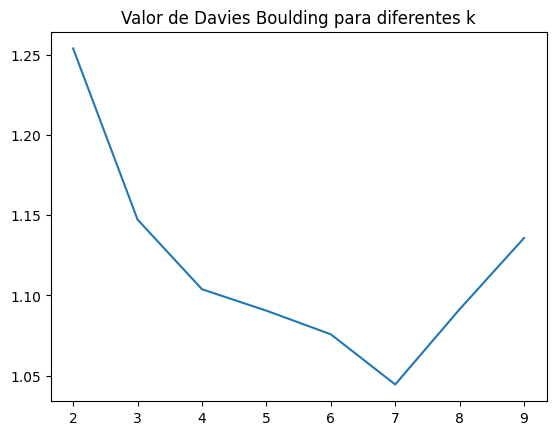

In [41]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')
opt_num_clusters = np.argmin(davies_boulding) + 2   #Empezamos con 2 clusters

Como podemos observar, el valor más bajo de Davies Boulding es para K=7, lo cual nos indica que el número óptimo de clusters es 7.



## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [42]:
#ejecutamos el algoritmo k-means para el número óptimo de clusters
km1 = KMeans(init='random', n_clusters=opt_num_clusters, random_state=333)
km1.fit(df2_scaled)
df1 = df2.assign(cluster=pd.Series(data=km1.labels_))
cluster_stats = df1.groupby(["cluster"]).describe().transpose()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cluster_stats)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



cluster                               0              1              2  \
longitude          count    4265.000000    2678.000000    1304.000000   
                   mean     -117.724438    -121.666408    -122.282063   
                   std         0.849701       0.975883       0.254063   
                   min      -120.820000    -124.350000    -122.870000   
                   25%      -118.150000    -122.250000    -122.450000   
                   50%      -117.710000    -121.880000    -122.330000   
                   75%      -117.160000    -121.280000    -122.170000   
                   max      -114.310000    -118.390000    -119.700000   
latitude           count    4265.000000    2678.000000    1304.000000   
                   mean       33.792174      37.991934      37.655798   
                   std         0.638431       0.965696       0.326990   
                   min        32.540000      35.620000      34.420000   
                   25%        33.480000      37.610

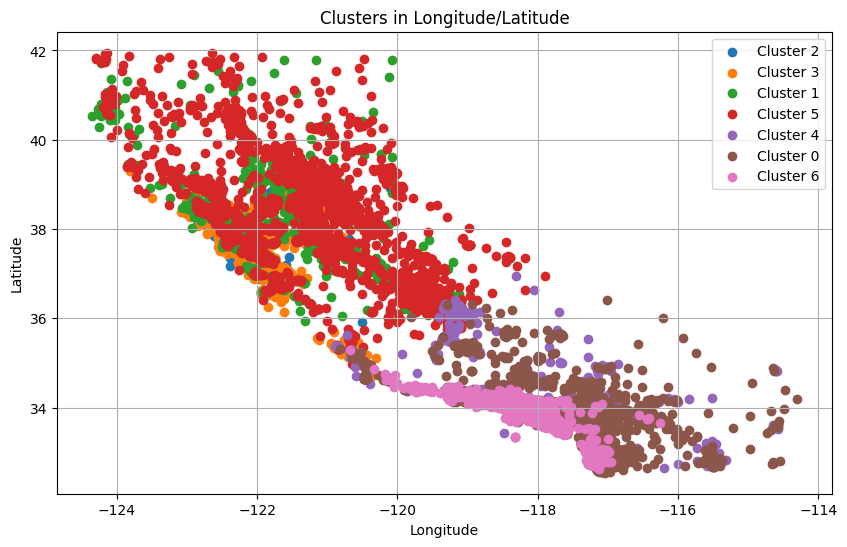

In [43]:
#mostramos por pantalla 5 de los clusters en fucnión de la longitud y la latitud
plt.figure(figsize=(10, 6))
for cluster_label in  df1['cluster'].unique()  :
    cluster_data = df1[df1['cluster'] == cluster_label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_label}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters in Longitude/Latitude')
plt.legend()
plt.grid(True)
plt.show()

Como nos han salido 7 clusters distintos, y resulta engorroso analizar tantos clusters, hemos decicido tomar 5 de ellos: 0,1,2,3,6.

El cluster 0 se encuentra en el sureste del estado de California (con coordenadas medias -117.7, 33.8). Además, la edad media de las viviendas es de 16.6 años, por lo que son relativamente nuevas. Asimismo, la población media es cercana a los 1000 habitantes, por lo que es una zona con media-baja densidad poblacional para estar en el estado de California. Por último, los ingresos medios son de 3.870 dólares, y el valor medio de las viviendas es de 183.000 dólares, lo cual nos indica que es una zona ciertamente humilde de California.

El cluster 1 se encuentra en el noroeste del estado de California (con coordenadas medias -121.6, 38). Además, la edad media de las viviendas es de 39.6 años, por lo que son relativamente antigüas. Asimismo, la población media es de casi 2000 habitantes, por lo que es una zona con mucha densidad poblacional para estar en el estado de California. Por último, los ingresos medios son de 2.770 dólares, y el valor medio de las viviendas es de 126.000 dólares, lo cual nos indica que es una zona muy humilde de California.

El cluster 2 se encuentra en el centro costero del estado de California (con coordenadas medias -122.3, 37.6). Además, la edad media de las viviendas es de 44.7 años, por lo que son bastante antigüas. Asimismo, la población media es cercana a los 1000 habitantes, por lo que es una zona con media-baja densidad poblacional para estar en el estado de California. Por último, los ingresos medios son de 5000 dólares, y el valor medio de las viviendas es de 386.000 dólares, lo cual nos indica que es una zona muy  rica de California.

El cluster 3 se encuentra en el centro costero del estado de California (con coordenadas medias -122, 37.5). Además, la edad media de las viviendas es de 21 años, por lo que son relativamente nuevas. Asimismo, la población media es cercana a los 1500 habitantes, por lo que es una zona con media-alta densidad poblacional para estar en el estado de California. Por último, los ingresos medios son de 5.600 dólares, y el valor medio de las viviendas es de 311.000 dólares, lo cual nos indica que es una zona  relativamente rica de California.

El cluster 6 se encuentra en el costa sur de California (con coordenadas medias -118.2, 34). Además, la edad media de las viviendas es de 31.4 años, por lo que son de eda media. Asimismo, la población media es cercana a los 1200 habitantes, por lo que es una zona con densidad poblacional media para estar en el estado de California. Por último, los ingresos medios son de 6.200 dólares, y el valor medio de las viviendas es de 413.000 dólares, lo cual nos indica que es una zona  muy rica de California.


## 6.1) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



In [45]:
#ejecutamos el algoritmo aglomerativo
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    ag1 = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    ag1.fit(df2_scaled)
    davies_boulding[k-2] = davies_bouldin_score(df2_scaled, ag1.labels_)

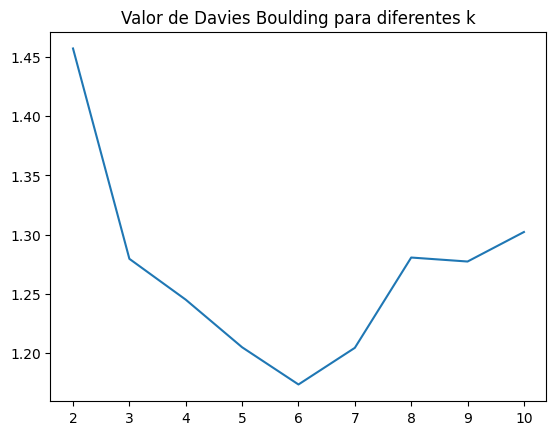

In [46]:
#mostramos los valores de Davios Boulding para cada k
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')
opt_num_clusters2 = np.argmin(davies_boulding) + 2   #Empezamos con 2 clusters

Como podemos observar, el valor más bajo de Davies Boulding es para K=6, lo cual nos indica que el número óptimo de clusters es 6.


## 6.2) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [47]:
#ejecutamos el algoritmo aglomerativo para el k óptimo
ag1 = AgglomerativeClustering(n_clusters=opt_num_clusters2, linkage='ward', metric='euclidean')
ag1.fit(df2_scaled)
df3 = df2.assign(cluster=pd.Series(data=ag1.labels_))
cluster_stats = df3.groupby(["cluster"]).describe().transpose()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cluster_stats)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



cluster                               0              1              2  \
longitude          count    2787.000000    6010.000000    3727.000000   
                   mean     -122.176146    -117.946253    -121.070883   
                   std         0.300919       0.654539       1.249658   
                   min      -123.170000    -122.390000    -124.300000   
                   25%      -122.430000    -118.300000    -121.920000   
                   50%      -122.190000    -118.140000    -121.240000   
                   75%      -121.975000    -117.850000    -120.120000   
                   max      -119.840000    -114.310000    -117.640000   
latitude           count    2787.000000    6010.000000    3727.000000   
                   mean       37.614349      33.882176      37.826072   
                   std         0.379342       0.456076       1.610708   
                   min        35.910000      32.560000      34.150000   
                   25%        37.360000      33.840

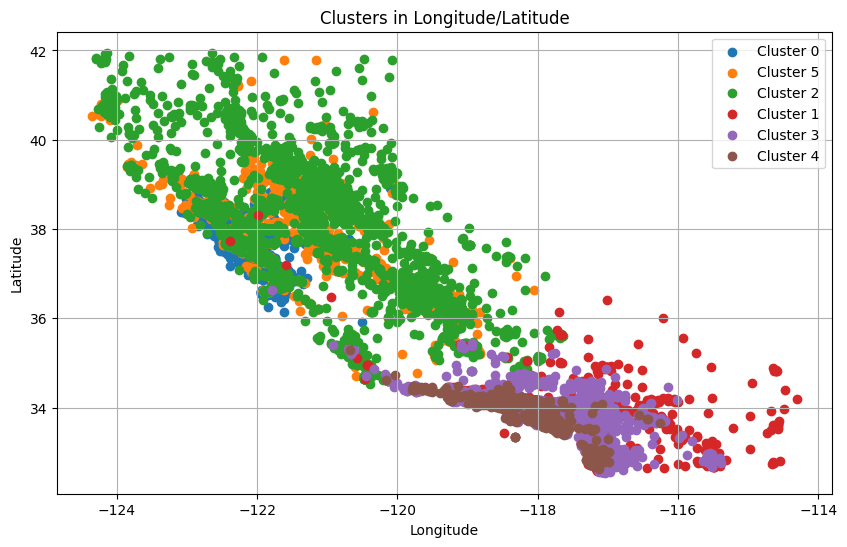

In [48]:
#mostramos por pantalla los clusters en función de la longitud y la latitud
plt.figure(figsize=(10, 6))
for cluster_label in  df3['cluster'].unique()  :
    cluster_data = df3[df3['cluster'] == cluster_label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_label}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters in Longitude/Latitude')
plt.legend()
plt.grid(True)
plt.show()

Como nos han salido 6 clusters distintos, y resulta engorroso analizar tantos clusters, hemos decicido tomar 5 de ellos: 0,1,3,4,5

El cluster 0 se encuentra en la coste del centro-norte del estado de California (con coordenadas medias -122.2, 37.6). Además, la edad media de las viviendas es de 33.5 años, por lo que son de antigüedad media. Asimismo, la población media es cercana a los 1300 habitantes, por lo que es una zona con densidad poblacional media para estar en el estado de California. Por último, los ingresos medios son de 5.300 dólares, y el valor medio de las viviendas es de 336.000 dólares, lo cual nos indica que es una zona ciertamente rica de California.

El cluster 1 se encuentra en el suroeste del estado de California (con coordenadas medias -118, 34). Además, la edad media de las viviendas es de 36 años, por lo que son relativamente antigüas. Asimismo, la población media es de unos 1.300 habitantes, por lo que es una zona con densidad poblacional media para estar en el estado de California. Por último, los ingresos medios son de 3.200 dólares, y el valor medio de las viviendas es de 180.000 dólares, lo cual nos indica que es una zona  humilde de California.


El cluster 3 se encuentra en el suroeste de California no muy en el interior (con coordenadas medias -117.7, 33.7). Además, la edad media de las viviendas es de 33.7 años, por lo que son de mediana edad. Asimismo, la población media es cercana a los 2000 habitantes, por lo que es una zona con alta densidad poblacional para estar en el estado de California. Por último, los ingresos medios son de 4.300 dólares, y el valor medio de las viviendas es de 213.000 dólares, lo cual nos indica que es una zona de riqueza media de California.


El cluster 4 se encuentra en el sur costero del estado de California (con coordenadas medias -118.2, 34). Además, la edad media de las viviendas es de 31 años, por lo que son de antigüedad media. Asimismo, la población media es cercana a los 1200 habitantes, por lo que es una zona con  densidad poblacional media de California. Por último, los ingresos medios son de 7.000 dólares, y el valor medio de las viviendas es de 470.000 dólares, lo cual nos indica que es una zona  muy rica de California.

El cluster 5 se encuentra en la mitad norte de California (con coordenadas medias -121.4, 37.8). Además, la edad media de las viviendas es de 38 años, por lo que son de eda media-alta. Asimismo, la población media es cercana a los 1000 habitantes, por lo que es una zona con densidad poblacional media-baja para estar en el estado de California. Por último, los ingresos medios son de 2.800 dólares, y el valor medio de las viviendas es de 121.000 dólares, lo cual nos indica que es una zona  muy humilde de California.
